# Лабораторная работа №1

## Численные методы решения нелинейных уравнений

Найти методом деления отрезка пополам, методом простой итерации, методом Ньютона и методом секущих хотя бы один корень нелинейного уравнения с точностью $\epsilon = 10^{-12}$ в соответствующем варианте задания. Сравнить результаты всех методов. Сделать выводы.

### Импорт необходимых библиотек

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import sympy as sp

### Построение графика функции

Уравнение по варианту имеет вид:

\begin{equation}
tg(x + \pi/5) = 0
\end{equation}

Определим данную функцию

In [3]:
def y(x):
    return np.tan(x + math.pi / 5)

Определим интервал, на котором будет построен график функции и количество используемых точек (влияет на гладкость)

In [4]:
LOWER_BOUND = -10
UPPER_BOUND = 11
COUNT = 500
X_TICKS_STEP = 1

Точность вычисления

In [5]:
EPSILON = 1e-12

Инициализируем значения функции на выбранном интервале и построим ее график

In [6]:
x_values = np.linspace(LOWER_BOUND, UPPER_BOUND, COUNT)
y_values = y(x_values)

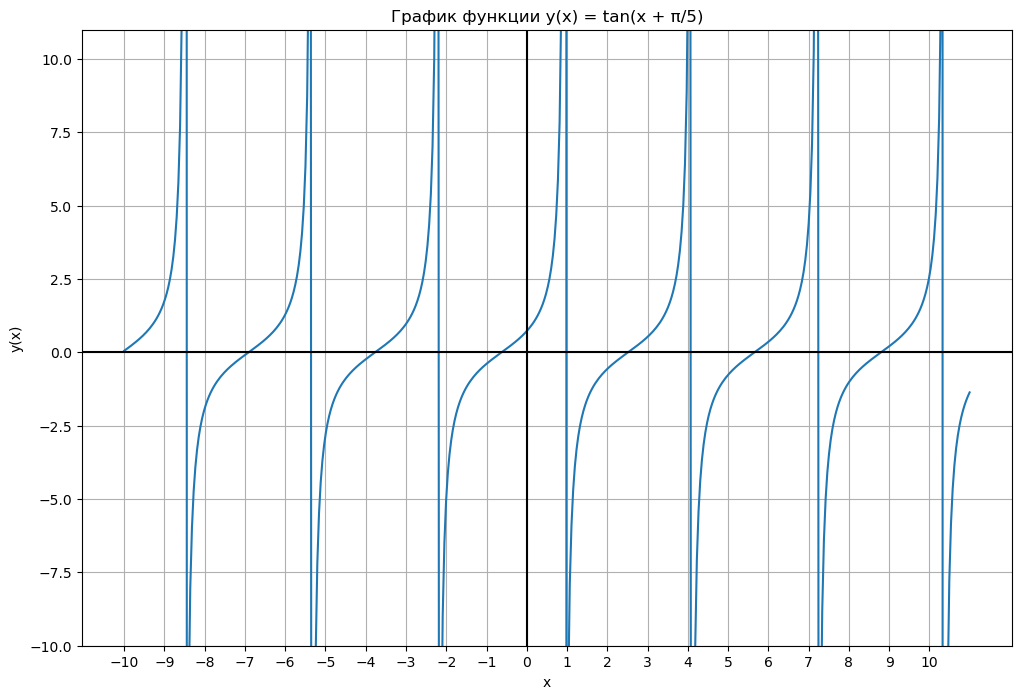

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values)
plt.title('График функции y(x) = tan(x + π/5)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.xticks(np.arange(LOWER_BOUND, UPPER_BOUND, X_TICKS_STEP))
plt.ylim(LOWER_BOUND, UPPER_BOUND)
plt.axhline(0, color='black',linewidth=1.5)
plt.axvline(0, color='black',linewidth=1.5)
plt.grid()
plt.show()

На графике видно, что функция ассимптотически приблежается к граничным значениям циклично идущих интервалов, монотонно возрастая внутри них

### Поиск корня уравнения методом бисекции

Возьмем 1-й положительный интервал (1; 4) и найдем корень уравнения на отрезке \[1.1; 3.9]

In [8]:
initial_a = 1.1
initial_b = 3.9

Построим график функции на данном отрезке

In [9]:
x_sample = np.linspace(initial_a, initial_b, COUNT)
y_sample = y(x_sample)

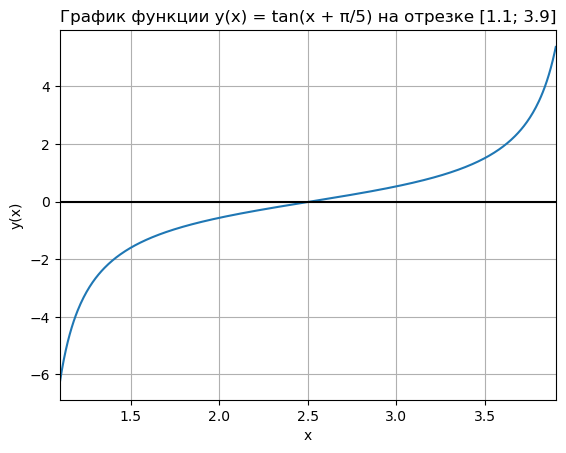

In [10]:
plt.plot(x_sample, y_sample)
plt.title(f'График функции y(x) = tan(x + π/5) на отрезке [{initial_a}; {initial_b}]')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.xticks(np.arange(LOWER_BOUND, UPPER_BOUND, X_TICKS_STEP * 0.5))
plt.xlim(initial_a, initial_b)
plt.axhline(0, color='black',linewidth=1.5)
plt.axvline(0, color='black',linewidth=1.5)
plt.grid()
plt.show()

Как видно из графика, корень функции находится в окрестности значения 2.5 по оси абсцисс. Проверим это

### Поиск корня уравнения методом бисекции

Суть метода заключается в выборе отрезка, внутри которого гарантированно находится корень уравнения, и итеративном его сужении в 2 раза в зависимости от знака значения функции в середине этого отрезка

Реализуем алгоритм поиска корня функции методом бисекции

In [11]:
iterations = 0
a = initial_a
b = initial_b

while b-a > EPSILON:
    iterations += 1
    current_x = (a + b) / 2
    if np.sign(y(current_x)) != np.sign(y(a)):
        b = current_x
        continue
    a = current_x
bisection_root = (a + b) / 2


print(f"Корень функции был найден за число итераций: {iterations}")
print(f"Корень функции на отрезке [{initial_a}; {initial_b}] равен {bisection_root}")

Корень функции был найден за число итераций: 42
Корень функции на отрезке [1.1; 3.9] равен 2.513274122872144


Проверим полученное значение

In [12]:
assert y(bisection_root) <= EPSILON
print("Корень уравнения найден верно")

Корень уравнения найден верно


### Поиск корня уравнения методом простой итерации

Суть метода заключается в итеративном вычислении $x_{i+1}$ по формуле:

\begin{equation}
x_{i+1} = x_i \pm b_i * f(x_i)
\end{equation}

где $x_i$ - значение аргумента на текущем шаге, $b_i$ - коэффициент, отражающий смещение в сторону корня функции

до тех пор, пока $f(x_i)$ не станет равным 0, или не будет выполняться условие:

\begin{equation}
\parallel x_{i+1} - x_i \parallel \leq \epsilon
\end{equation}

и

\begin{equation}
sign(f(x_{i+1})) \neq sign(f(x_i))
\end{equation}

Корнем функции будет финальное значение $x$

#### Метод релаксации

Отличие данного метода заключается в том, что коэффициент $b$ выбирается 1 раз, и не меняется между итерациями

Для того чтобы метод релаксации сходился, необходимо выполнение условия:

\begin{equation}
-2 < -b * f'(x_*) < 0
\end{equation}

или

\begin{equation}
0 < b * f'(x_*) < 2
\end{equation}

где $x_*$ - примерное значение корня уравнения

Реализуем данный метод

Найдем производную исследуемой функции в точке, найденной с помощью предыдущего метода

In [13]:
x = sp.symbols('x')
f = sp.tan(x + sp.pi / 5)

f

tan(x + pi/5)

In [14]:
f_prime = sp.diff(f, x)
f_prime

tan(x + pi/5)**2 + 1

In [15]:
prime_value = float(f_prime.subs(x, bisection_root))
prime_value

1.0

Пусть шаг имеет точность 2 знака после запятой

In [16]:
step_precision = 2

Тогда сам шаг будет равен (возьмем максимально возможное значение, чтобы продемонстрировать насколько плохо использовать большие шаги)

In [17]:
possible_step_increment = 10**(-1 * step_precision)

step = round(np.quantile(np.arange(possible_step_increment, 2 / prime_value, possible_step_increment), 0.25), step_precision)
step

0.5

Реализуем сам метод релаксации

In [18]:
step_sign = -1 if np.sign(y(b)) > np.sign(y(a)) else 1
step_sign

-1

В качестве начального приближения $x_0$ будем использовать среднее арифметическое значений границ рассматриваемого интервала

При использовании пограничных значений с большим шагом есть риск выпасть за интервал и либо уйти в ассимптоту, либо найти ноль функции на другом интервале

In [19]:
current_x = initial_b
iterations = 0

while True:
    iterations += 1
    prev_x = current_x
    current_x = prev_x + step_sign * step * y(prev_x)
    if abs(current_x - prev_x) <= EPSILON:
        break

relaxation_root = current_x    

print(f"Корень функции был найден за число итераций: {iterations}")
print(f"Корень функции на отрезке [{initial_a}; {initial_b}] равен {relaxation_root}")

Корень функции был найден за число итераций: 41
Корень функции на отрезке [1.1; 3.9] равен 2.5132741228726343


Проверим полученное значение

In [20]:
assert y(relaxation_root) <= EPSILON
print("Корень уравнения найден верно")

Корень уравнения найден верно


#### Классический метод простой итерации

В данном подходе мы будем уменьшать значение шага при смене знака значением функции в рассматриваемой точке, вместо использования константы, как это было в методе релаксации 

В качестве исходного значения шага возьмем значение из метода релаксации

In [21]:
step_decreasing_coefficient = 0.5
step_increasing_coefficient = 1.5

In [22]:
current_x = initial_b
iterations = 0

while True:
    iterations += 1
    prev_x = current_x
    current_x = prev_x + step_sign * step * y(prev_x)
    if abs(current_x - prev_x) <= EPSILON:
        break
    if y(current_x) * y(prev_x) < 0:
        step *= step_decreasing_coefficient
        continue
    step *= step_increasing_coefficient

iteration_root = current_x    

print(f"Корень функции был найден за число итераций: {iterations}")
print(f"Корень функции на отрезке [{initial_a}; {initial_b}] равен {iteration_root}")

Корень функции был найден за число итераций: 20
Корень функции на отрезке [1.1; 3.9] равен 2.513274122871466


Проверим полученное значение

In [23]:
assert y(iteration_root) <= EPSILON
print("Корень уравнения найден верно")

Корень уравнения найден верно


### Поиск корня уравнения методом Ньютона

Суть метода заключается в итеративном вычислении $x_{i+1}$ по формуле:

\begin{equation}
x_{i+1} = x_i - \frac {f(x_i)}{f'(x_i)}
\end{equation}

до тех пор, пока не будет выполняться условие остановки:

\begin{equation}
\left|\frac{x_{i+1} - x_i}{1 - \frac{x_{i+1} - x_i}{x_i - x_{i-1}}}\right|< \epsilon
\end{equation}

При выполнении условия остановки значение $x_{i+1}$ и будет искомым корнем уравнения

На практике значением $x_{i-1}$, при проверке условия остановки, можно пренебречь

Производная функции была вычислена на предыдущих шагах

In [24]:
f_prime

tan(x + pi/5)**2 + 1

In [25]:
current_x = initial_b
iterations = 0

while True:
    iterations += 1
    prev_x = current_x
    current_x = prev_x - y(prev_x) / float(f_prime.subs(x, prev_x))
    if abs((current_x - prev_x) / (1 - ((current_x - prev_x) / prev_x))) < EPSILON:
        break
        
newton_root = current_x
print(f"Корень функции был найден за число итераций: {iterations}")
print(f"Корень функции на отрезке [{initial_a}; {initial_b}] равен {newton_root}")

Корень функции был найден за число итераций: 7
Корень функции на отрезке [1.1; 3.9] равен 2.5132741228718345


Проверим полученное значение

In [26]:
assert y(newton_root) <= EPSILON
print("Корень уравнения найден верно")

Корень уравнения найден верно


### Поиск корня уравнения методом секущих

При использовании метода секущих формула вычисления $x_{i+1}$ имеет вид:

\begin{equation}
x_{i+1} = x_i - f(x_i) * \frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1})}
\end{equation}

то есть для использования метода нужно взять 2 приближения $x_0$ и $x_1$

вычисление останавливается, если выполняется условие:

\begin{equation}
\mid x_{i+1} - x_i \mid \leq \epsilon
\end{equation}

и корнем уравнения считается значение $x_{i+1}$

In [27]:
current_x = initial_b
prev_x = initial_b - EPSILON
iterations = 0

while True:
    iterations += 1
    current_x, prev_x = current_x - y(current_x) / (y(current_x) - y(prev_x)) * (current_x - prev_x), current_x
    if abs(current_x - prev_x) < EPSILON:
        break

secant_root = current_x
print(f"Корень функции был найден за число итераций: {iterations}")
print(f"Корень функции на отрезке [{initial_a}; {initial_b}] равен {secant_root}")

Корень функции был найден за число итераций: 10
Корень функции на отрезке [1.1; 3.9] равен 2.5132741228718345


Проверим полученное значение

In [28]:
assert y(secant_root) <= EPSILON
print("Корень уравнения найден верно")

Корень уравнения найден верно
